In [1]:
import os
import glob
import json
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
from dance_evaluation import *
import matplotlib.pyplot as plt

def load_from_pickle(filepath):
    """Load json_tempodata from a Pickle (.pkl) file."""
    # filepath = os.path.join(readpath, filename)
    with open(filepath, "rb") as f:
        json_tempodata = pickle.load(f)
    return json_tempodata

#### Tolerance vs. Accuracy

In [1]:
a = 70
b = 145
mode = "uni"
norm_mode = "z-score"

w_sec = 5
h_sec = w_sec/2
tol_type = "rel"
case = "win_case_2"
bpm_metric = "bpm_median_xy"
tolerance_list = np.arange(1,21).tolist()

bpm_dict = {
    "bpm_avg_x": 0, "bpm_avg_y": 1, "bpm_avg_xy": 2, "bpm_mode_x": 3,
    "bpm_mode_y": 4, "bpm_mode_xy": 5, "bpm_median_x": 6, "bpm_median_y": 7,
    "bpm_median_xy": 8
}


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=False)

titles = ["Position-Based", "Velocity-Based", "Combined PosVel"]

pos_acc_list = []
vel_acc_list = []
posvel_acc_list = []

# Iterate through window sizes
for tol in tolerance_list:

    # Load accuracy data
    hpos_hits_stats = load_from_pickle(f"./saved_results/{case}/stats_pos/tempo_{a}_{b}/tolerance/{tol_type}/{mode}/hit_stats_W{w_sec}H{h_sec}_tol{tol}_{mode}_{a}_{b}.pkl")
    hvel_hits_stats = load_from_pickle(f"./saved_results/{case}/stats_vel/tempo_{a}_{b}/tolerance/{tol_type}/{mode}/hit_stats_W{w_sec}H{h_sec}_tol{tol}_{mode}_{a}_{b}.pkl")
    hposvel_hits_stats = load_from_pickle(f"./saved_results/{case}/stats_posvel/tempo_{a}_{b}/tolerance/{tol_type}/{mode}/hit_stats_W{w_sec}H{h_sec}_tol{tol}_{mode}_{a}_{b}.pkl")

    # Extract accuracy
    pos_acc_list.append(hpos_hits_stats[bpm_metric]['hits_summary']['hits_percentage'][4])  
    vel_acc_list.append(hvel_hits_stats[bpm_metric]['hits_summary']['hits_percentage'][4])
    posvel_acc_list.append(hposvel_hits_stats[bpm_metric]['hits_summary']['hits_percentage'][4])

# Plot in respective subplots
axes[0].plot(tolerance_list, pos_acc_list, marker='o', linestyle='-')
axes[1].plot(tolerance_list, vel_acc_list, marker='o', linestyle='-')
axes[2].plot(tolerance_list, posvel_acc_list, marker='o', linestyle='-')

# Add titles and labels
for i, ax in enumerate(axes):
    ax.set_title(titles[i], fontsize=12)
    ax.set_xlabel("Tolerance percentage")
    ax.set_ylim(0, 100)  # Keep y-axis consistent
    ax.set_xticks(np.arange(0,21,1))  # Keep y-axis consistent
    ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)  # Enable minor grid
    # ax.minorticks_on()
    # ax.legend(fontsize=8)  # Add legend for hop sizes

axes[0].set_ylabel("Accuracy (%)")  # Add y-label only for first subplot

# Global title and layout
plt.suptitle(f"Tolerance vs. Accuracy (Win:{w_sec} sec, Hop:{h_sec} sec)", fontsize=14)
plt.tight_layout()
plt.show()

NameError: name 'np' is not defined

#### Single Plot

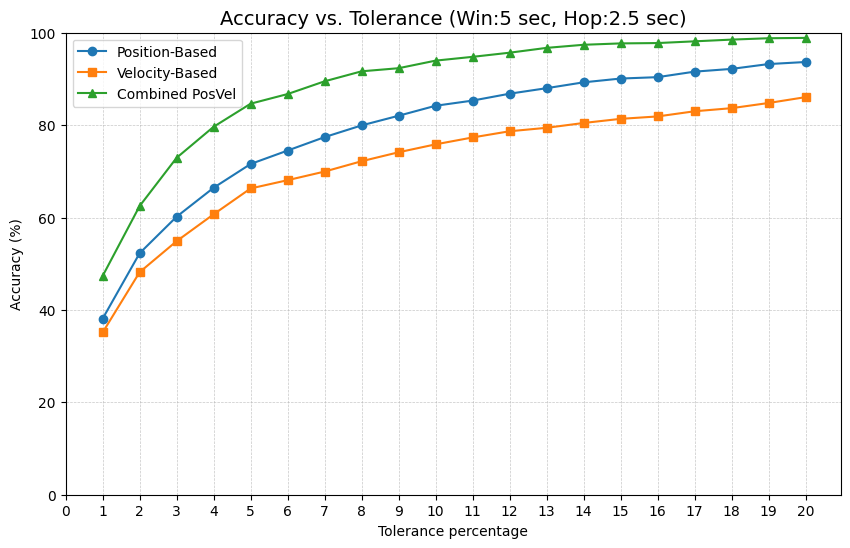

In [ ]:
# Define parameters
a = 70
b = 145
mode = "uni"
norm_mode = "z-score"

w_sec = 5
h_sec = w_sec / 2
tol_type = "rel"
case = "win_case_2"
bpm_metric = "bpm_median_xy"
tolerance_list = np.arange(1, 21).tolist()

pos_acc_list = []
vel_acc_list = []
posvel_acc_list = []

# Iterate through window sizes
for tol in tolerance_list:

    # Load accuracy data
    hpos_hits_stats = load_from_pickle(f"./saved_results/{case}/stats_pos/tempo_{a}_{b}/tolerance/{tol_type}/{mode}/hit_stats_W{w_sec}H{h_sec}_tol{tol}_{mode}_{a}_{b}.pkl")
    hvel_hits_stats = load_from_pickle(f"./saved_results/{case}/stats_vel/tempo_{a}_{b}/tolerance/{tol_type}/{mode}/hit_stats_W{w_sec}H{h_sec}_tol{tol}_{mode}_{a}_{b}.pkl")
    hposvel_hits_stats = load_from_pickle(f"./saved_results/{case}/stats_posvel/tempo_{a}_{b}/tolerance/{tol_type}/{mode}/hit_stats_W{w_sec}H{h_sec}_tol{tol}_{mode}_{a}_{b}.pkl")

    # Extract accuracy
    pos_acc_list.append(hpos_hits_stats[bpm_metric]['hits_summary']['hits_percentage'][4])  
    vel_acc_list.append(hvel_hits_stats[bpm_metric]['hits_summary']['hits_percentage'][4])
    posvel_acc_list.append(hposvel_hits_stats[bpm_metric]['hits_summary']['hits_percentage'][4])

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(tolerance_list, pos_acc_list, marker='o', linestyle='-', label="Position-Based")
plt.plot(tolerance_list, vel_acc_list, marker='s', linestyle='-', label="Velocity-Based")
plt.plot(tolerance_list, posvel_acc_list, marker='^', linestyle='-', label="Combined PosVel")

# Labels and titles
plt.title(f"Tolerance vs. Accuracy (Win:{w_sec} sec, Hop:{h_sec} sec)", fontsize=14)
plt.xlabel("Tolerance percentage")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)  # Keep y-axis consistent
plt.xticks(np.arange(0, 21, 1))
plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend(fontsize=10)

# Show plot
plt.show()
